In [85]:
import cv2

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [55]:
fer2013="C:/RESEARCH/FER2013NEW"

In [82]:
'''
#import os
#import cv2
#import numpy as np
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical

# Define the paths to your dataset
#data_directory = "C:/RESEARCH/FER2013NEW/train"
#emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
#num_classes = len(emotion_labels)

# Load and preprocess data
#X_data = []
#y_labels = []

#for emotion_label in emotion_labels:
#    emotion_directory = os.path.join(data_directory, emotion_label)
    
 #   for filename in os.listdir(emotion_directory):
  #      img_path = os.path.join(emotion_directory, filename)
  #      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        
        # Resize the image to a consistent size (e.g., 48x48)
        img = cv2.resize(img, (48, 48))
        
        X_data.append(img)
        y_labels.append(emotion_labels.index(emotion_label))

X_data = np.array(X_data)
y_labels = np.array(y_labels)

# Normalize pixel values to [0, 1]
#X_data = X_data / 255.0

# Convert labels to one-hot encoded format
#y_labels = to_categorical(y_labels, num_classes=num_classes)

# Perform train-test split
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)
'''

'\n#import os\n#import cv2\n#import numpy as np\n#from sklearn.model_selection import train_test_split\n#from tensorflow.keras.utils import to_categorical\n\n# Define the paths to your dataset\n#data_directory = "C:/RESEARCH/FER2013NEW/train"\n#emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]\n#num_classes = len(emotion_labels)\n\n# Load and preprocess data\n#X_data = []\n#y_labels = []\n\n#for emotion_label in emotion_labels:\n#    emotion_directory = os.path.join(data_directory, emotion_label)\n    \n #   for filename in os.listdir(emotion_directory):\n  #      img_path = os.path.join(emotion_directory, filename)\n  #      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale\n        \n        # Resize the image to a consistent size (e.g., 48x48)\n        img = cv2.resize(img, (48, 48))\n        \n        X_data.append(img)\n        y_labels.append(emotion_labels.index(emotion_label))\n\nX_data = np.array(X_data)\ny_label

In [83]:
'''
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the paths to your dataset
data_directory = "C:/RESEARCH/FER2013NEW/test"
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)

# Load and preprocess data
X_data = []
y_labels = []

for emotion_label in emotion_labels:
    emotion_directory = os.path.join(data_directory, emotion_label)
    
    for filename in os.listdir(emotion_directory):
        img_path = os.path.join(emotion_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        
        # Resize the image to a consistent size (e.g., 48x48)
        img = cv2.resize(img, (48, 48))
        
        X_data.append(img)
        y_labels.append(emotion_labels.index(emotion_label))

X_data = np.array(X_data)
y_labels = np.array(y_labels)
'''

'\nimport os\nimport cv2\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.utils import to_categorical\n\n# Define the paths to your dataset\ndata_directory = "C:/RESEARCH/FER2013NEW/test"\nemotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]\nnum_classes = len(emotion_labels)\n\n# Load and preprocess data\nX_data = []\ny_labels = []\n\nfor emotion_label in emotion_labels:\n    emotion_directory = os.path.join(data_directory, emotion_label)\n    \n    for filename in os.listdir(emotion_directory):\n        img_path = os.path.join(emotion_directory, filename)\n        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale\n        \n        # Resize the image to a consistent size (e.g., 48x48)\n        img = cv2.resize(img, (48, 48))\n        \n        X_data.append(img)\n        y_labels.append(emotion_labels.index(emotion_label))\n\nX_data = np.array(X_data)\ny_labels = np.array(y_l

In [84]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Preprocess images
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 48, 48,3)
X_test = X_test.reshape(X_test.shape[0], 48, 48,3)

# Data augmentation
data_augmentation = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Build your own classification layers
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.show()
'''

"import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.applications import VGG16\nfrom tensorflow.keras.layers import Dense, Flatten\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report, confusion_matrix\nimport matplotlib.pyplot as plt\n\n\n\n# Perform train-test split\nX_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)\n\n# Preprocess images\nX_train = X_train / 255.0\nX_test = X_test / 255.0\nX_train = X_train.reshape(X_train.shape[0], 48, 48,3)\nX_test = X_test.reshape(X_test.shape[0], 48, 48,3)\n\n# Data augmentation\ndata_augmentation = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)\n\n# Load pre-trained VGG16 model\nbase_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48))\n\n# Freeze layers\nfor layer in base_model.

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os

In [104]:
train_folder="C:/RESEARCH/FER2013NEW/train"
test_folder="C:/RESEARCH/FER2013NEW/test"

In [149]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  # List of emotion labels
num_classes = len(emotion_labels)

In [150]:
num_classes

7

In [168]:
def load_images_from_folder(folder):
    images = []  # Create an empty list to store images
    labels = []  # Create an empty list to store labels
    for label_idx, emotion_label in enumerate(emotion_labels):
        # Construct the path to the folder containing images for the current emotion
        emotion_folder = os.path.join(folder, emotion_label)
        for filename in os.listdir(emotion_folder):
            # Construct the path to each image and load it using OpenCV
            img_path = os.path.join(emotion_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))  # Resize the image to a fixed size
            img_rgb = np.stack((img,) * 3, axis=-1)
            images.append(img_rgb)
            labels.append(label_idx)  # Add the corresponding label index to the list
    return images, labels

In [102]:
#train_data="C:/RESEARCH/FER2013NEW/train/Training_50580"

In [99]:
t=cv2.imread("C:/RESEARCH/FER2013NEW/train/happy/Training_50580.jpg")

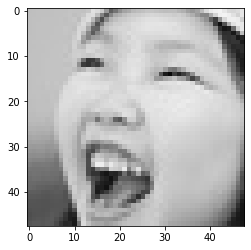

In [100]:
plt.imshow(t)

In [101]:
t.shape

(48, 48, 3)

In [169]:
# Load and Preprocess Data
X_train, y_train = load_images_from_folder(train_folder)  # Load and preprocess training data
X_test, y_test = load_images_from_folder(test_folder)

In [170]:
X_train = np.array(X_train)  # Convert the list of images to a NumPy array
y_train = np.array(y_train)  # Convert the list of labels to a NumPy array
X_test = np.array(X_test)  # Convert the list of images to a NumPy array
y_test = np.array(y_test) 

In [171]:
X_train.shape

(28709, 48, 48, 3)

In [172]:
y_train.shape

(28709,)

In [120]:
#X_test

In [173]:
y_train_cat=to_categorical(y_train,num_classes=num_classes)

In [174]:
y_train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [175]:
y_test_cat=to_categorical(y_test,num_classes=num_classes)

In [176]:
y_test_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [177]:
y_train_cat.shape

(28709, 7)

In [178]:
y_test_cat.shape

(7178, 7)

In [139]:
#normalize pixel values

In [179]:
X_train=X_train/255
X_test=X_test/255

In [142]:
#X_train

In [161]:
# transfer learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [162]:
# Add custom classification layers on top of the pre-trained base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [163]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [164]:
# Freeze layers in the pre-trained base model
for layer in base_model.layers:
    layer.trainable = False

In [165]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [180]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom classification layers on top of the pre-trained base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the pre-trained base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test_cat))


Epoch 1/10
898/898 [==============================] - 763s 846ms/step - loss: 1.6169 - accuracy: 0.3646 - val_loss: 1.5609 - val_accuracy: 0.3969
Epoch 2/10
898/898 [==============================] - 646s 719ms/step - loss: 1.5324 - accuracy: 0.4088 - val_loss: 1.5271 - val_accuracy: 0.4028
Epoch 3/10
898/898 [==============================] - 642s 715ms/step - loss: 1.4940 - accuracy: 0.4266 - val_loss: 1.5247 - val_accuracy: 0.4115
Epoch 4/10
898/898 [==============================] - 655s 730ms/step - loss: 1.4629 - accuracy: 0.4400 - val_loss: 1.4825 - val_accuracy: 0.4266
Epoch 5/10
898/898 [==============================] - 655s 730ms/step - loss: 1.4310 - accuracy: 0.4530 - val_loss: 1.4863 - val_accuracy: 0.4207
Epoch 6/10
898/898 [==============================] - 644s 717ms/step - loss: 1.4059 - accuracy: 0.4642 - val_loss: 1.4814 - val_accuracy: 0.4238
Epoch 7/10
898/898 [==============================] - 632s 704ms/step - loss: 1.3761 - accuracy: 0.4802 - val_loss: 1.4906 -


KeyboardInterrupt



In [181]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

225/225 [==============================] - 146s 648ms/step - loss: 1.4712 - accuracy: 0.4351
Test loss: 1.4712
Test accuracy: 0.4351


NameError: name 'history' is not defined

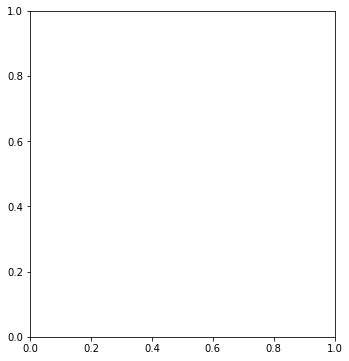

In [182]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')